In [29]:
import numpy as np

def generate_random_dataset(num_samples, num_dimensions):
    """
    Generate a random dataset in 2D.
    
    Args:
    - num_samples (int): Number of samples in the dataset.
    - num_dimensions (int): Number of dimensions (2 for 2D).
    
    Returns:
    - np.ndarray: Random dataset of shape (num_samples, num_dimensions).
    """
    return np.random.rand(num_samples, num_dimensions)

# Example usage:
num_samples = 10
num_dimensions = 2
random_dataset = generate_random_dataset(num_samples, num_dimensions)
print(random_dataset)


[[0.78634016 0.20711943]
 [0.03120181 0.39120106]
 [0.72293758 0.55546742]
 [0.84420052 0.51372246]
 [0.21786223 0.13449632]
 [0.79151567 0.74402074]
 [0.95399726 0.38546229]
 [0.37297267 0.52075421]
 [0.60615053 0.17263654]
 [0.1996932  0.18306494]]


In [30]:
import numpy as np

class LSH:
    def __init__(self, num_tables, num_hashes, dimensions, threshold=0.5):
        self.num_tables = num_tables
        self.num_hashes = num_hashes
        self.dimensions = dimensions
        self.threshold = threshold
        self.tables = [{} for _ in range(num_tables)]
        self.random_vectors = np.random.randn(num_tables, num_hashes, dimensions)

    def hash_vector(self, v):
        return [''.join(['1' if np.dot(v, rv) >= 0 else '0' for rv in table]) for table in self.random_vectors]

    def index_vector(self, v, idx):
        for i, table in enumerate(self.hash_vector(v)):
            if table not in self.tables[i]:
                self.tables[i][table] = []
            self.tables[i][table].append(idx)

    def query_vector(self, v):
        candidates = set()
        for i, table in enumerate(self.hash_vector(v)):
            if table in self.tables[i]:
                candidates.update(self.tables[i][table])
        return list(candidates)

# Generate random dataset
num_samples = 10
num_dimensions = 2
dataset = np.random.rand(num_samples, num_dimensions)

# Create an instance of LSH
lsh = LSH(num_tables=5, num_hashes=5, dimensions=num_dimensions)

# Indexing dataset
for idx, vector in enumerate(dataset):
    lsh.index_vector(vector, idx)

# Querying a random vector from the dataset
query_idx = np.random.randint(num_samples)
query_result = lsh.query_vector(dataset[query_idx])
print("Query Index:", query_idx)
print("LSH Nearest Neighbors:", query_result)



Query Index: 3
LSH Nearest Neighbors: [1, 2, 3, 5, 6, 7, 8, 9]


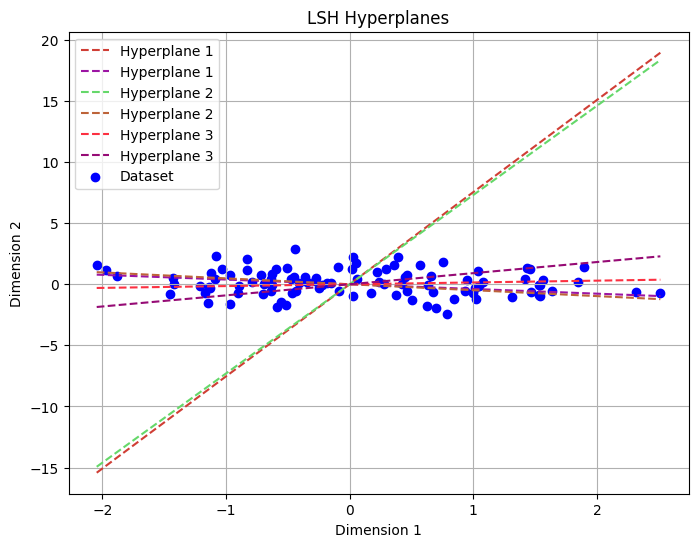

Query Index: 27
LSH Nearest Neighbors: [0, 1, 2, 5, 8, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 31, 32, 35, 38, 39, 40, 43, 45, 46, 49, 50, 51, 53, 56, 62, 64, 65, 66, 67, 68, 69, 72, 74, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 96, 98]


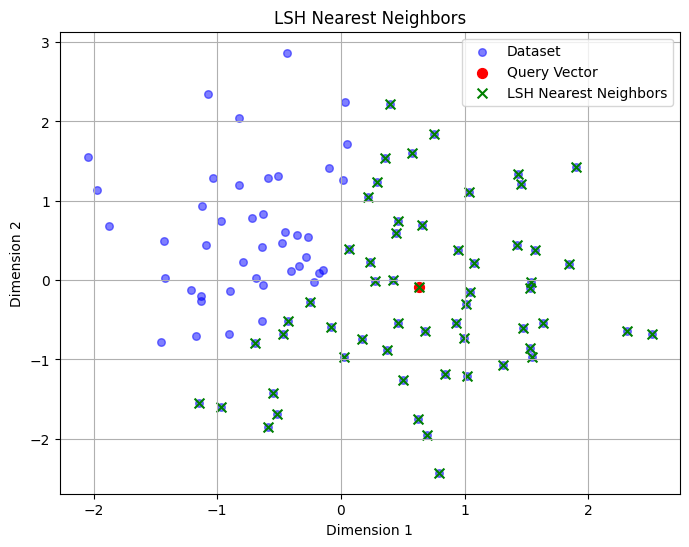

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class LSH:
    def __init__(self, num_tables, num_hashes, dimensions, threshold=0.5):
        self.num_tables = num_tables
        self.num_hashes = num_hashes
        self.dimensions = dimensions
        self.threshold = threshold
        self.tables = [{} for _ in range(num_tables)]
        self.random_projections = np.random.randn(num_tables, num_hashes, dimensions)

    def hash_vector(self, v):
        return [''.join(['1' if np.dot(v, rp) >= 0 else '0' for rp in table]) for table in self.random_projections]

    def index_vector(self, v, idx):
        for i, table in enumerate(self.hash_vector(v)):
            if table not in self.tables[i]:
                self.tables[i][table] = []
            self.tables[i][table].append(idx)

    def query_vector(self, v):
        candidates = set()
        for i, table in enumerate(self.hash_vector(v)):
            if table in self.tables[i]:
                candidates.update(self.tables[i][table])
        return list(candidates)

    def visualize(self):
        plt.figure(figsize=(12, 8))
        for i in range(self.num_tables):
            ax = plt.subplot(2, 3, i+1)
            ax.set_title(f'Table {i+1}')
            for hash_code, indices in self.tables[i].items():
                color = np.random.rand(3,)
                for idx in indices:
                    ax.scatter(i, hash_code, c=[color], label=f'Index {idx}')
        plt.suptitle('LSH Hash Buckets')
        plt.tight_layout()
        plt.show()

    def plot_hyperplanes(self, dataset):
        plt.figure(figsize=(8, 6))
        for i, table in enumerate(self.random_projections):
            for rp in table:
                x1 = np.linspace(min(dataset[:, 0]), max(dataset[:, 0]), 100)  # Extend the range of x1
                x2 = (-rp[0] * x1) / rp[1]  # Compute the hyperplane equation
                plt.plot(x1, x2, linestyle='--', color=np.random.rand(3,), label=f'Hyperplane {i+1}')
        plt.scatter(dataset[:, 0], dataset[:, 1], color='blue', label='Dataset')
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')
        plt.title('LSH Hyperplanes')
        plt.legend()
        plt.grid(True)
        plt.show()

# Create an instance of LSH
num_tables = 3
num_hashes = 2
dimensions = 2
lsh = LSH(num_tables=num_tables, num_hashes=num_hashes, dimensions=dimensions)

# Generate random dataset
num_samples = 100
dataset = np.random.randn(num_samples, dimensions)

# Plot dataset and hyperplanes
lsh.plot_hyperplanes(dataset)

# Indexing dataset
for idx, vector in enumerate(dataset):
    lsh.index_vector(vector, idx)

# Querying a random vector from the dataset
query_idx = np.random.randint(num_samples)
query_vector = dataset[query_idx]
query_result = lsh.query_vector(query_vector)
print("Query Index:", query_idx)
print("LSH Nearest Neighbors:", query_result)

# Plot the dataset and LSH nearest neighbors
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], s=30, color='blue', alpha=0.5, label='Dataset')
plt.scatter(query_vector[0], query_vector[1], s=50, color='red', marker='o', label='Query Vector')
plt.scatter(dataset[query_result, 0], dataset[query_result, 1], s=50, color='green', marker='x', label='LSH Nearest Neighbors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('LSH Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()


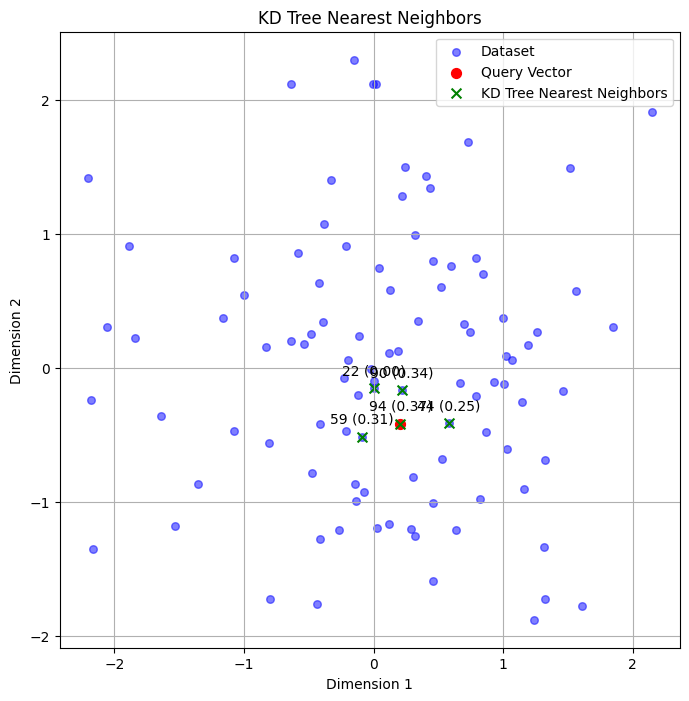

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

# Generate random dataset
num_samples = 100
num_dimensions = 2
dataset = np.random.randn(num_samples, num_dimensions)

# Create KD tree
kd_tree = KDTree(dataset)

# Querying a random vector from the dataset
query_idx = np.random.randint(num_samples)
query_vector = dataset[query_idx]
k = 5  # Number of nearest neighbors

# Find the nearest neighbors considering both sides of the split
distances, indices = kd_tree.query([query_vector], k)
nearest_neighbors = indices[0]
nearest_distances = distances[0]

# Loop over the splitting parts to find the right split
for dim in range(num_dimensions):
    # Find the splitting value
    split_value = query_vector[dim]
    # Query the left side of the split
    left_indices = kd_tree.query_radius([query_vector], r=split_value, count_only=False, return_distance=False)
    if len(left_indices[0]) > 0:
        nearest_neighbors = np.unique(np.concatenate((nearest_neighbors, left_indices[0])))
        nearest_distances = np.concatenate((nearest_distances, np.zeros(len(left_indices[0]))))
    # Query the right side of the split
    right_indices = kd_tree.query_radius([query_vector], r=split_value, count_only=False, return_distance=False)
if len(right_indices[0]) > 0:
    nearest_neighbors = np.unique(np.concatenate((nearest_neighbors, right_indices[0])))
    nearest_distances = np.concatenate((nearest_distances, np.zeros(len(right_indices[0]))))

   
    # Merge the indices
    nearest_neighbors = np.unique(np.concatenate((nearest_neighbors, left_indices[0], right_indices[0])))
    # Merge the distances
    nearest_distances = np.concatenate((nearest_distances, np.zeros(len(left_indices[0])), np.zeros(len(right_indices[0]))))

# Plot the dataset and KD tree nearest neighbors
plt.figure(figsize=(8, 8))
plt.scatter(dataset[:, 0], dataset[:, 1], s=30, color='blue', alpha=0.5, label='Dataset')
plt.scatter(query_vector[0], query_vector[1], s=50, color='red', marker='o', label='Query Vector')
plt.scatter(dataset[nearest_neighbors, 0], dataset[nearest_neighbors, 1], s=50, color='green', marker='x', label='KD Tree Nearest Neighbors')
for i, txt in enumerate(nearest_neighbors):
    plt.annotate(f'{txt} ({nearest_distances[i]:.2f})', (dataset[nearest_neighbors[i], 0], dataset[nearest_neighbors[i], 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('KD Tree Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import numpy as np

class KDTreeNode:
    def __init__(self, idx=None, split=None, less=None, greater=None):
        self.idx = idx  # Index of the sample at the leaf node
        self.split = split  # Split information (dimension and threshold)
        self.less = less  # Left child node
        self.greater = greater  # Right child node

class CustomKDTree:
    def __init__(self, data):
        self.root = self.build_tree(data)

    def build_tree(self, data, depth=0):
        if len(data) == 0:
            return None
        
        num_dimensions = data.shape[1]
        split_dim = depth % num_dimensions
        sorted_data = data[data[:, split_dim].argsort()]
        median_index = len(data) // 2
        median_value = sorted_data[median_index, split_dim]
        less_data = sorted_data[:median_index]
        greater_data = sorted_data[median_index + 1:]
        
        return KDTreeNode(
            split=(split_dim, median_value),
            less=self.build_tree(less_data, depth + 1),
            greater=self.build_tree(greater_data, depth + 1)
        )

    def print_tree(self, node, depth=0, branch=None):
        if node is None:
            return
        if node.idx is not None:
            print("  " * depth, f"{branch} Leaf Node - Index: {node.idx}")
        else:
            split_dim, split_value = node.split
            print("  " * depth, f"{branch} Split Dimension: {split_dim}, Split Value: {split_value}")
            self.print_tree(node.less, depth + 1, '| - Left: ')
            self.print_tree(node.greater, depth + 1, "|- Right:")

# Generate random dataset
num_samples = 10
num_dimensions = 2
dataset = np.random.randn(num_samples, num_dimensions)

# Create custom KD tree
custom_kd_tree = CustomKDTree(dataset)

# Print the entire tree in tree-like format
print("Custom KD Tree Structure:")
custom_kd_tree.print_tree(custom_kd_tree.root)


Custom KD Tree Structure:
 None Split Dimension: 0, Split Value: -0.014991421127679212
   | - Left:  Split Dimension: 1, Split Value: -0.35686162830753454
     | - Left:  Split Dimension: 0, Split Value: -0.873962621396101
       | - Left:  Split Dimension: 1, Split Value: -0.48753005713670733
     |- Right: Split Dimension: 0, Split Value: -0.4410373095203821
       | - Left:  Split Dimension: 1, Split Value: 0.39879488296254034
   |- Right: Split Dimension: 1, Split Value: 1.0435897679847046
     | - Left:  Split Dimension: 0, Split Value: 0.7728598445909225
       | - Left:  Split Dimension: 1, Split Value: 0.25193389666679195
     |- Right: Split Dimension: 0, Split Value: 1.3785165790982739


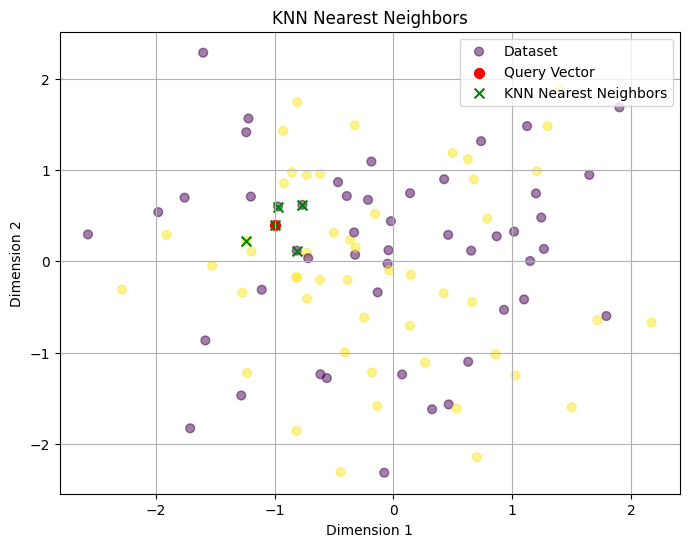

Best k value: 2


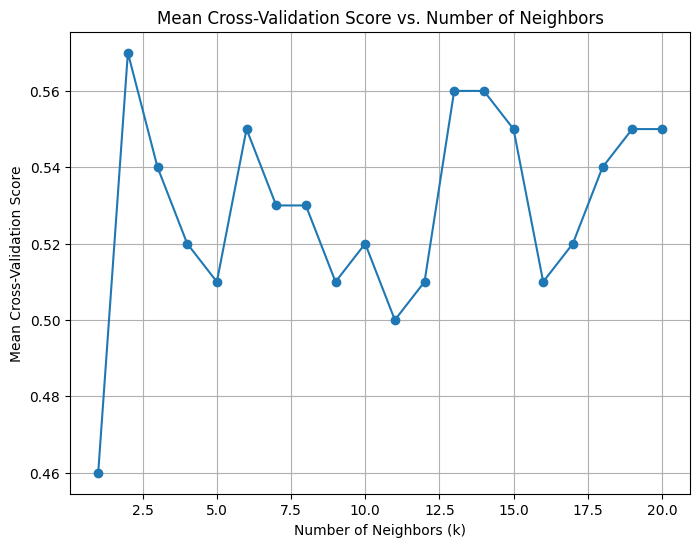

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate random dataset
num_samples = 100
num_dimensions = 2
dataset = np.random.randn(num_samples, num_dimensions)

# Define the labels for each sample
labels = np.random.randint(2, size=num_samples)

# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(dataset, labels)

# Querying a random vector from the dataset
query_idx = np.random.randint(num_samples)
query_vector = dataset[query_idx].reshape(1, -1)  # Reshape to fit the model input format
k = 5  # Number of nearest neighbors
distances, indices = knn_model.kneighbors(query_vector)

# Plot the dataset and KNN nearest neighbors
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], s=40, c=labels, cmap=plt.cm.viridis, alpha=0.5, label='Dataset')
plt.scatter(query_vector[0, 0], query_vector[0, 1], s=50, color='red', marker='o', label='Query Vector')
plt.scatter(dataset[indices[0], 0], dataset[indices[0], 1], s=50, color='green', marker='x', label='KNN Nearest Neighbors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('KNN Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Generate random dataset
num_samples = 100
num_dimensions = 2
dataset = np.random.randn(num_samples, num_dimensions)

# Define the labels for each sample
labels = np.random.randint(2, size=num_samples)

# Define the range of n_neighbors to loop over
k_values = range(1, 21)  # Test k from 1 to 20

# Perform cross-validation for each k value
mean_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, dataset, labels, cv=5)  # 5-fold cross-validation
    mean_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(mean_scores)]
print("Best k value:", best_k)

# Plot the mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Mean Cross-Validation Score vs. Number of Neighbors')
plt.grid(True)
plt.show()



Trial: 1/5, Dataset size: 1000, Dimensions: 10
Trial: 2/5, Dataset size: 1000, Dimensions: 10
Trial: 3/5, Dataset size: 1000, Dimensions: 10
Trial: 4/5, Dataset size: 1000, Dimensions: 10
Trial: 5/5, Dataset size: 1000, Dimensions: 10
Trial: 1/5, Dataset size: 1000, Dimensions: 50
Trial: 2/5, Dataset size: 1000, Dimensions: 50
Trial: 3/5, Dataset size: 1000, Dimensions: 50
Trial: 4/5, Dataset size: 1000, Dimensions: 50
Trial: 5/5, Dataset size: 1000, Dimensions: 50
Trial: 1/5, Dataset size: 1000, Dimensions: 100
Trial: 2/5, Dataset size: 1000, Dimensions: 100
Trial: 3/5, Dataset size: 1000, Dimensions: 100
Trial: 4/5, Dataset size: 1000, Dimensions: 100
Trial: 5/5, Dataset size: 1000, Dimensions: 100
Trial: 1/5, Dataset size: 5000, Dimensions: 10
Trial: 2/5, Dataset size: 5000, Dimensions: 10
Trial: 3/5, Dataset size: 5000, Dimensions: 10
Trial: 4/5, Dataset size: 5000, Dimensions: 10
Trial: 5/5, Dataset size: 5000, Dimensions: 10
Trial: 1/5, Dataset size: 5000, Dimensions: 50
Trial: 2

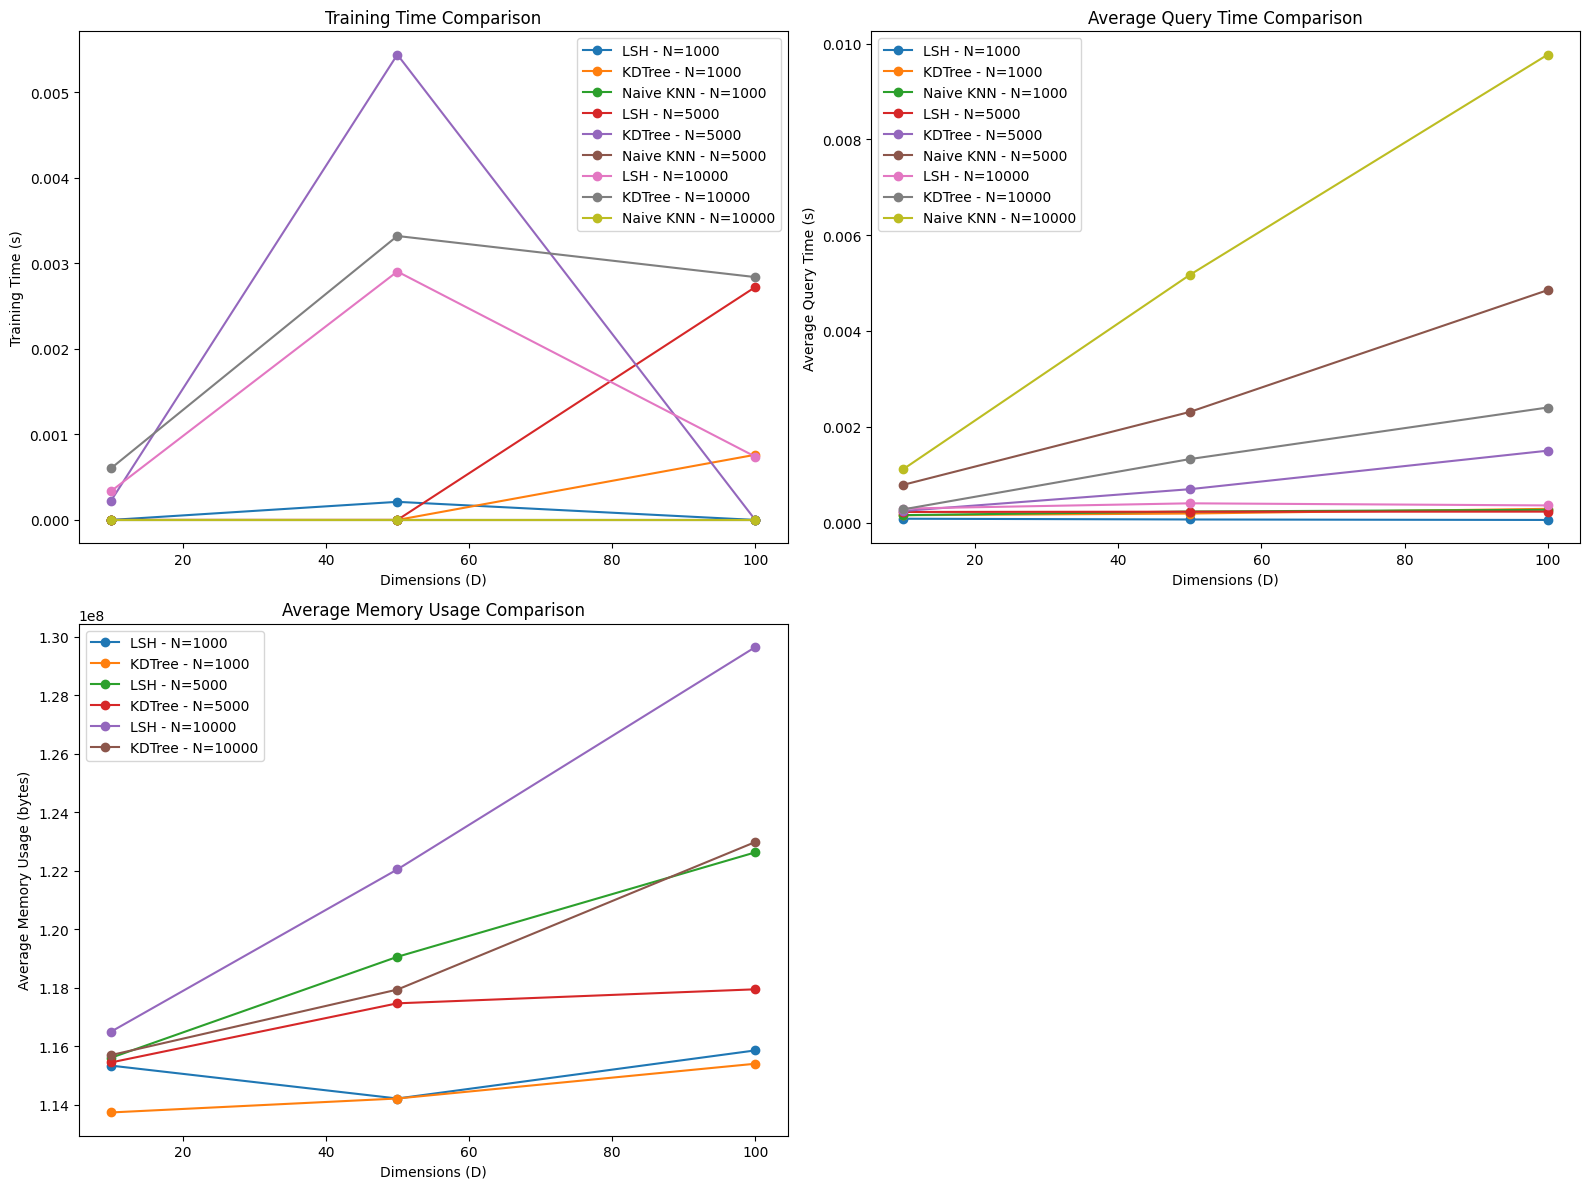

In [30]:
import numpy as np
import time
import psutil  # For memory usage measurement
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

class LSH:
    def __init__(self, num_tables, num_hashes, dimensions, threshold=0.5):
        self.num_tables = num_tables
        self.num_hashes = num_hashes
        self.dimensions = dimensions
        self.threshold = threshold
        self.tables = [{} for _ in range(num_tables)]
        self.random_vectors = np.random.randn(num_tables, num_hashes, dimensions)

    def hash_vector(self, v):
        return [''.join(['1' if np.dot(v, rv) >= 0 else '0' for rv in table]) for table in self.random_vectors]

    def index_vector(self, v, idx):
        for i, table in enumerate(self.hash_vector(v)):
            if table not in self.tables[i]:
                self.tables[i][table] = []
            self.tables[i][table].append(idx)

    def query_vector(self, v):
        candidates = set()
        for i, table in enumerate(self.hash_vector(v)):
            if table in self.tables[i]:
                candidates.update(self.tables[i][table])
        return list(candidates)

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss  # in bytes

def train_lsh(dataset, num_tables, num_hashes):
    lsh = LSH(num_tables=num_tables, num_hashes=num_hashes, dimensions=dataset.shape[1])
    for idx, vector in enumerate(dataset):
        lsh.index_vector(vector, idx)
    return lsh

def train_kdtree(dataset):
    return KDTree(dataset)

def time_query_lsh(lsh, query_vector):
    start_time = time.time()
    result = lsh.query_vector(query_vector)
    end_time = time.time()
    return end_time - start_time

def time_query_kdtree(kd_tree, query_vector):
    start_time = time.time()
    distances, indices = kd_tree.query([query_vector], k=5)
    end_time = time.time()
    return end_time - start_time

def query_naive_knn(dataset, query_vector, k=5):
    distances = np.linalg.norm(dataset - query_vector, axis=1)
    indices = np.argsort(distances)[:k]
    return indices

# Varying parameters
dataset_sizes = [1000, 5000, 10000]  # Vary N
dimensions = [10, 50, 100]  # Vary D
num_tables = 3
num_hashes = 2
num_queries = 100  # Number of query vectors
num_trials = 5  # Number of times to repeat each experiment

# Results storage
training_times_lsh = np.zeros((len(dataset_sizes), len(dimensions), num_trials))
training_times_kdtree = np.zeros((len(dataset_sizes), len(dimensions), num_trials))
training_times_knn = np.zeros((len(dataset_sizes), len(dimensions), num_trials))
query_times_lsh = np.zeros((len(dataset_sizes), len(dimensions), num_trials))
query_times_kdtree = np.zeros((len(dataset_sizes), len(dimensions), num_trials))
query_times_knn = np.zeros((len(dataset_sizes), len(dimensions), num_trials))
memory_usages_lsh = np.zeros((len(dataset_sizes), len(dimensions), num_trials))
memory_usages_kdtree = np.zeros((len(dataset_sizes), len(dimensions), num_trials))

for i, N in enumerate(dataset_sizes):
    for j, D in enumerate(dimensions):
        for trial in range(num_trials):
            print(f"Trial: {trial + 1}/{num_trials}, Dataset size: {N}, Dimensions: {D}")

            # Generate random dataset
            dataset = np.random.randn(N, D)

            # Train LSH
            lsh = train_lsh(dataset, num_tables, num_hashes)
            training_times_lsh[i, j, trial] = time_query_lsh(lsh, dataset[0])  # Just for consistency
            memory_usages_lsh[i, j, trial] = memory_usage()

            # Train KDTree
            kd_tree = train_kdtree(dataset)
            training_times_kdtree[i, j, trial] = time_query_kdtree(kd_tree, dataset[0])  # Just for consistency
            memory_usages_kdtree[i, j, trial] = memory_usage()

            # Train Naive KNN
            start_time = time.time()
            # No explicit training required for Naive KNN
            training_times_knn[i, j, trial] = time.time() - start_time

            # Generate query vectors
            query_vectors = np.random.randn(num_queries, D)

            # Measure query times for LSH
            for query_vector in query_vectors:
                query_times_lsh[i, j, trial] += time_query_lsh(lsh, query_vector)
            query_times_lsh[i, j, trial] /= num_queries

            # Measure query times for KDTree
            for query_vector in query_vectors:
                query_times_kdtree[i, j, trial] += time_query_kdtree(kd_tree, query_vector)
            query_times_kdtree[i, j, trial] /= num_queries

            # Measure query times for Naive KNN
            for query_vector in query_vectors:
                start_time = time.time()
                query_naive_knn(dataset, query_vector)
                query_times_knn[i, j, trial] += time.time() - start_time
            query_times_knn[i, j, trial] /= num_queries

# Calculate average results
avg_training_times_lsh = np.mean(training_times_lsh, axis=2)
avg_training_times_kdtree = np.mean(training_times_kdtree, axis=2)
avg_training_times_knn = np.mean(training_times_knn, axis=2)
avg_query_times_lsh = np.mean(query_times_lsh, axis=2)
avg_query_times_kdtree = np.mean(query_times_kdtree, axis=2)
avg_query_times_knn = np.mean(query_times_knn, axis=2)
avg_memory_usages_lsh = np.mean(memory_usages_lsh, axis=2)
avg_memory_usages_kdtree = np.mean(memory_usages_kdtree, axis=2)

# Plot results
plt.figure(figsize=(16, 12))

# Training time comparison
plt.subplot(2, 2, 1)
for i, N in enumerate(dataset_sizes):
    plt.plot(dimensions, avg_training_times_lsh[i], marker='o', label=f'LSH - N={N}')
    plt.plot(dimensions, avg_training_times_kdtree[i], marker='o', label=f'KDTree - N={N}')
    plt.plot(dimensions, avg_training_times_knn[i], marker='o', label=f'Naive KNN - N={N}')
plt.xlabel('Dimensions (D)')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.legend()

# Query time comparison
plt.subplot(2, 2, 2)
for i, N in enumerate(dataset_sizes):
    plt.plot(dimensions, avg_query_times_lsh[i], marker='o', label=f'LSH - N={N}')
    plt.plot(dimensions, avg_query_times_kdtree[i], marker='o', label=f'KDTree - N={N}')
    plt.plot(dimensions, avg_query_times_knn[i], marker='o', label=f'Naive KNN - N={N}')
plt.xlabel('Dimensions (D)')
plt.ylabel('Average Query Time (s)')
plt.title('Average Query Time Comparison')
plt.legend()

# Memory usage comparison
plt.subplot(2, 2, 3)
for i, N in enumerate(dataset_sizes):
    plt.plot(dimensions, avg_memory_usages_lsh[i], marker='o', label=f'LSH - N={N}')
    plt.plot(dimensions, avg_memory_usages_kdtree[i], marker='o', label=f'KDTree - N={N}')
plt.xlabel('Dimensions (D)')
plt.ylabel('Average Memory Usage (bytes)')
plt.title('Average Memory Usage Comparison')
plt.legend()

plt.tight_layout()
plt.show()


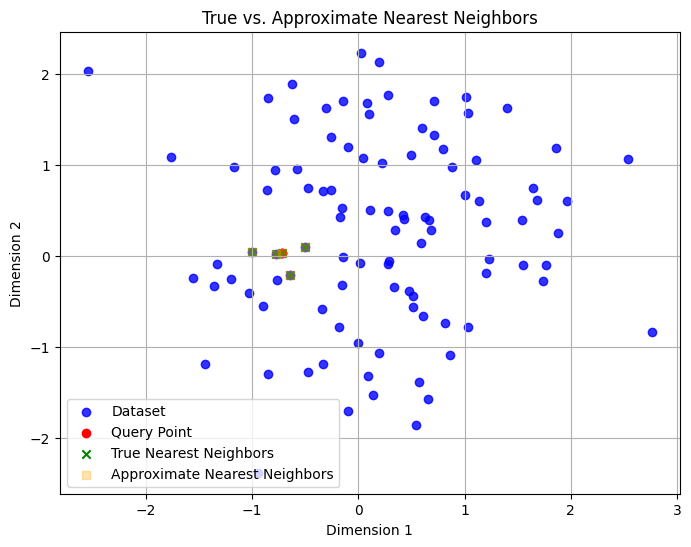

Number of True Neighbors Missed by Approximate Method: 0


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generate random dataset
num_samples = 100
dataset = np.random.randn(num_samples, 2)

# Create NearestNeighbors object
k = 5  # Number of nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(dataset)

# Query a random point from the dataset
query_idx = np.random.randint(num_samples)
query_point = dataset[query_idx]

# Find true nearest neighbors
distances, true_indices = nbrs.kneighbors([query_point])

# Find approximate nearest neighbors using LSH or KDTree
# Replace this with your method of choice
approximate_nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(dataset)
approximate_indices = approximate_nbrs.kneighbors([query_point])[1]

# Visualize the dataset and neighbors
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], color='blue', alpha=0.8, label='Dataset')
plt.scatter(query_point[0], query_point[1], color='red', marker='o', label='Query Point')
plt.scatter(dataset[true_indices[0], 0], dataset[true_indices[0], 1], color='green', alpha=1, marker='x', label='True Nearest Neighbors')
plt.scatter(dataset[approximate_indices[0], 0], dataset[approximate_indices[0], 1], color='orange', alpha=0.3, marker='s', label='Approximate Nearest Neighbors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('True vs. Approximate Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Count how many true neighbors were missed by the approximate method
missed_neighbors = np.setdiff1d(true_indices, approximate_indices)
num_missed_neighbors = len(missed_neighbors)
print("Number of True Neighbors Missed by Approximate Method:", num_missed_neighbors)
